# Shopping During Covid-19 LockDown in South Africa

As South Africa is on Day 2 of a 21-Day National Lock-down to stop the spread of the novel Corona Virus, I have thought it appropriate to include a Lock-down theme in my project.

In South Africa (and a few other places around the world, we are only allowed to buy groceries and get health care.  One of my (and many others') concerns are that many people probably already have the virus and not even know it, and are therefore spreading it around when they do shopping.  
If I could choose, I would rather go to a grocery store which is not near a pharmacy, as a lot of people might want to go to both on their limited outings.  
If I could figure out which grocery stores are further away from pharmacies and vise versa, I could assume that those stores might have less foot traffic and less chances of getting infected.  
I can also add health care facilities where one would assume people go when they suspect that they are ill.  If they are ill, but their symptoms are not severe enough to be admitted to hospital, they might stop by a nearby store or pharmacy on their way home to stock up on food and medicine for their quarantine period.  
For people who want to stay away from other people while shopping, they might also avoid stores and pharmacies near hospitals.

The target audience for this project will be anyone who is looking for the best places to buy their essentials during this lock-down period. 
Some, like me, might want to go to isolated stores where there is a chance of less people.  Yet others might want to go to the closest stores they can get, and maybe where grocery stores and pharmacies are close together.  
Either way, this projects will help with that.

In [1]:
import pandas as pd
import numpy as np

In [2]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




I Install folium and geopy so that I will be able to draw a map, as well as plot different coordinates on it.

In [3]:
!pip install geopy

In [4]:
!pip install folium

In [5]:
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

## Now I define my Foursquare Credentials and Version

In [6]:
#Establishing FourSquare Credentials
CLIENT_ID = 'AKBWLJHMGEQFFNUQ0AZYFLMKNQI0LUL4BWVVX43TMR0MCO5N' # your Foursquare ID
CLIENT_SECRET = 'KZEMDT2LQ3SPMR0H13IUQUDPMMMN24KEVEJMUXT2FM2DKNEB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AKBWLJHMGEQFFNUQ0AZYFLMKNQI0LUL4BWVVX43TMR0MCO5N
CLIENT_SECRET:KZEMDT2LQ3SPMR0H13IUQUDPMMMN24KEVEJMUXT2FM2DKNEB


In [26]:
address = '2 Darling Street, Cape Town, South Africa'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-33.92598 18.4251798


# Grocery Stores

During the LockDown period, we are only allowed to buy essential items.  These items can be bought at grocery stores.  To cover more venues, I used the Category ID's for Grocery Stores, Convenience Stores, Super Markets, Fruit and Vegetable stores and Butchers

Put your Coordinates in at the en of the URL

In [37]:
urlFood = "https://api.foursquare.com/v2/venues/explore?categoryId=4bf58dd8d48988d118951735,4d954b0ea243a5684a65b473,52f2ab2ebcbc57f1066b8b46,52f2ab2ebcbc57f1066b8b1c,4bf58dd8d48988d11d951735&client_id=AKBWLJHMGEQFFNUQ0AZYFLMKNQI0LUL4BWVVX43TMR0MCO5N&client_secret=KZEMDT2LQ3SPMR0H13IUQUDPMMMN24KEVEJMUXT2FM2DKNEB&v=20180605&radius=10000&limit=100&ll=-33.92598,%2018.4251798"
Groceries_json = requests.get(urlFood).json()
Groceries_json

{'meta': {'code': 200, 'requestId': '5e80b92fdf2774001bcab501'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Cape Town',
  'headerFullLocation': 'Cape Town',
  'headerLocationGranularity': 'city',
  'query': 'grocery store',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': -33.835979909999914,
    'lng': 18.533442581478557},
   'sw': {'lat': -34.01598009000009, 'lng': 18.31691701852144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf7e2078d30d13a70a4ff17',
       'name': 'Spar',
       'location': {'address': '27 Somerset Road',
        'crossStreet': 'at Napier St.',
        'lat': -33.91537412,
        'lng': 18.41805674,
        'labeledLatLngs': [{'label': '

The next step is to clean the Json file and create a dataframe with columns and rows.

In [28]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = Groceries_json['response']['groups'][0]['items']
    
Grocery_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Grocery_venues =Grocery_venues.loc[:, filtered_columns]

# filter the category for each row
Grocery_venues['venue.categories'] = Grocery_venues.apply(get_category_type, axis=1)

# clean columns
Grocery_venues.columns = [col.split(".")[-1] for col in Grocery_venues.columns]

Grocery_venues

,name,categories,lat,lng
0,Spar,Grocery Store,-33.915374,18.418057
1,Woolworths,Grocery Store,-33.929538,18.410976
2,Fruit & Veg On Roeland,Fruit & Vegetable Store,-33.930189,18.424090
3,Woolworths Food,Grocery Store,-33.909167,18.413118
4,The Butcher Man,Butcher,-33.907759,18.409406
...,...,...,...,...
95,Kwikspar Milnerton,Deli / Bodega,-33.882730,18.495368
96,Woolworths,Convenience Store,-33.864497,18.495497
97,Engen 1 Plus Kenilworth,Gas Station,-33.987085,18.485040
98,Engen Regal Convenience Centre,Gas Station,-33.987064,18.485303


## Map of all the Grocery Stores in the area (Blue Dots)

I use Geocode and Folium to draw up a map and pinpoint locations. All the locations for Grocery stores are pinned in Blue.

In [29]:
GroceryShop = folium.Map(location=[-33.92598,18.4251798],zoom_start=13)
for lat, lng, name, categories in zip(Grocery_venues['lat'], Grocery_venues['lng'], Grocery_venues['name'], Grocery_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(GroceryShop) 
    
GroceryShop

# Pharmacies

For this Foursquare search, I used the Category ID's for Pharmacies, Drug Stores and medical Supply Stores

In [30]:
urlMeds = "https://api.foursquare.com/v2/venues/explore?categoryId=5745c2e4498e11e7bccabdbd,4bf58dd8d48988d10f951735,58daa1558bbb0b01f18ec206&client_id=AKBWLJHMGEQFFNUQ0AZYFLMKNQI0LUL4BWVVX43TMR0MCO5N&client_secret=KZEMDT2LQ3SPMR0H13IUQUDPMMMN24KEVEJMUXT2FM2DKNEB&v=20180605&radius=10000&limit=100&ll=-33.92598,%2018.4251798"
BuyMedicine_json = requests.get(urlMeds).json()
BuyMedicine_json

{'meta': {'code': 200, 'requestId': '5e80b1a7b1cac0001bbfeed4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Cape Town',
  'headerFullLocation': 'Cape Town',
  'headerLocationGranularity': 'city',
  'query': 'drugstore',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': -33.835979909999914,
    'lng': 18.533442581478557},
   'sw': {'lat': -34.01598009000009, 'lng': 18.31691701852144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b599030f964a520ae8c28e3',
       'name': 'Wellness Warehouse',
       'location': {'address': 'Lifestyle on Kloof, 50 Kloof St',
        'lat': -33.9293476507859,
        'lng': 18.411281611958117,
        'labeledLatLngs': [{'label': 'disp

The next step is to clean the Json file and create a dataframe with columns and rows.

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
Medvenues = BuyMedicine_json['response']['groups'][0]['items']
    
Pharmacy_venues = pd.json_normalize(Medvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Pharmacy_venues =Pharmacy_venues.loc[:, filtered_columns]

# filter the category for each row
Pharmacy_venues['venue.categories'] = Pharmacy_venues.apply(get_category_type, axis=1)

# clean columns
Pharmacy_venues.columns = [col.split(".")[-1] for col in Pharmacy_venues.columns]

Pharmacy_venues

,name,categories,lat,lng
0,Wellness Warehouse,Pharmacy,-33.929348,18.411282
1,Clicks,Pharmacy,-33.902715,18.421354
2,Clicks,Pharmacy,-33.908331,18.397243
3,Dis-Chem Seapoint,Pharmacy,-33.920616,18.383113
4,Clicks,Cosmetics Shop,-33.934280,18.417411
5,Lite Kem Pharmacy,Pharmacy,-33.924460,18.422907
6,Clicks Pharmacy,Pharmacy,-33.923634,18.419297
7,Clicks,Pharmacy,-33.920465,18.423863
8,Dis-Chem Pharmacy Culemborg,Pharmacy,-33.919999,18.424393
9,Chinn's Corner Pharmacy,Pharmacy,-33.933463,18.419338


## Map of all the Pharmacies in the area (Red dots)

I use Geocode and Folium to draw up a map and pinpoint locations. All the locations for Pharmacies are pinned in Red

In [32]:
Pharmacies = folium.Map(location=[-33.92598,18.4251798],zoom_start=13)
for lat, lng, name, categories in zip(Pharmacy_venues['lat'], Pharmacy_venues['lng'], Pharmacy_venues['name'], Pharmacy_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#f58e8e',
        fill_opacity=0.7,
        parse_html=False).add_to(Pharmacies) 

Pharmacies

# Medical Centres

For this Foursquare search, I used the Category ID's for Hospitals, Emergency Rooms, Doctors offices and Urgent Care Centers

In [33]:
urlHOSP = "https://api.foursquare.com/v2/venues/explore?categoryId=4bf58dd8d48988d194941735,4bf58dd8d48988d196941735,4bf58dd8d48988d177941735,56aa371be4b08b9a8d573526&client_id=AKBWLJHMGEQFFNUQ0AZYFLMKNQI0LUL4BWVVX43TMR0MCO5N&client_secret=KZEMDT2LQ3SPMR0H13IUQUDPMMMN24KEVEJMUXT2FM2DKNEB&v=20180605&radius=10000&limit=100&ll=-33.92598,%2018.4251798"
Hospitals_json = requests.get(urlHOSP).json()
Hospitals_json

{'meta': {'code': 200, 'requestId': '5e80b12c1835dd001cd04d45'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Cape Town',
  'headerFullLocation': 'Cape Town',
  'headerLocationGranularity': 'city',
  'query': 'emergency room',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': -33.835979909999914,
    'lng': 18.533442581478557},
   'sw': {'lat': -34.01598009000009, 'lng': 18.31691701852144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5894222d4f218a63bf010589',
       'name': 'Christiaan Barnard Memorial Hospital',
       'location': {'lat': -33.917799,
        'lng': 18.430297,
        'labeledLatLngs': [{'label': 'display',
          'lat': -33.917799,
          'l

The next step is to clean the Json file and create a dataframe with columns and rows.

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
Hospvenues = Hospitals_json['response']['groups'][0]['items']
    
Hospital_venues = pd.json_normalize(Hospvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Hospital_venues =Hospital_venues.loc[:, filtered_columns]

# filter the category for each row
Hospital_venues['venue.categories'] = Hospital_venues.apply(get_category_type, axis=1)

# clean columns
Hospital_venues.columns = [col.split(".")[-1] for col in Hospital_venues.columns]

Hospital_venues

,name,categories,lat,lng
0,Christiaan Barnard Memorial Hospital,Hospital,-33.917799,18.430297
1,Christian Barnard Memorial Hospital,Hospital,-33.917623,18.429868
2,Doctors Rooms - 3 Kloof nek road,Doctor's Office,-33.930334,18.408808
3,Cape Town Medi Clinic,Hospital,-33.935733,18.410757
4,Dr Duncan McGuire,Doctor's Office,-33.935780,18.410770
5,Vincent Palotti Hospital,Hospital,-33.944298,18.490371
6,Groote Schuur Hospital Outpatients,Hospital,-33.940441,18.461301
7,Groote Schuur Hospital,Hospital,-33.941075,18.462446
8,UCT Academic Hospital,Hospital,-33.942114,18.463739
9,Valkenberg Hospital,Hospital,-33.936169,18.477965


## Map of all the Medical centers in the area (Yellow dots)

I use Geocode and Folium to draw up a map and pinpoint locations. All the locations for Hospitals are pinned in Yellow

In [35]:
Medical = folium.Map(location=[-33.92598,18.4251798],zoom_start=13)

for lat, lng, name, categories in zip(Hospital_venues['lat'], Hospital_venues['lng'], Hospital_venues['name'], Hospital_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#fed37e',
        fill_opacity=0.7,
        parse_html=False).add_to(Medical) 
    
Medical

# Location Map

I use Geocode and Folium to draw up a map and pinpoint locations.  All the locations for Grocery stores are pinned in Blue.  Locations for Pharmacies are pinned in Red. And Locations for Hospitals are pinned in Yellow

In [36]:
EssentialShop = folium.Map(location=[-33.92598,18.4251798],zoom_start=13)
for lat, lng, name, categories in zip(Grocery_venues['lat'], Grocery_venues['lng'], Grocery_venues['name'], Grocery_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(EssentialShop) 
for lat, lng, name, categories in zip(Pharmacy_venues['lat'], Pharmacy_venues['lng'], Pharmacy_venues['name'], Pharmacy_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#f58e8e',
        fill_opacity=0.7,
        parse_html=False).add_to(EssentialShop) 
for lat, lng, name, categories in zip(Hospital_venues['lat'], Hospital_venues['lng'], Hospital_venues['name'], Hospital_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#fed37e',
        fill_opacity=0.7,
        parse_html=False).add_to(EssentialShop) 
    
EssentialShop

## Just For Fun

Since the whole world is affected by this novel Corona Virus, I decided to use another skill learnt throughout this course, namely Word Cloud to make a presentation of what social Distancing means.  I used an article "What is Social Distancing and how can it slow the spread of Covid-19?" which I found on https://hub.jhu.edu/2020/03/13/what-is-social-distancing/

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

Note: you may need to restart the kernel to use updated packages.


I copied an article from the above-mentioned url and saved it as a txt

In [20]:
SD = open('SD.txt', 'r').read()

In [21]:
stopwords = set(STOPWORDS)

After realising that the names "Singleby" and "Rivers" and also the word "says" comes up in the wordcloud, I added it to our stopwords and re-generated the cloud

In [22]:
SD_wc = WordCloud(
    background_color='white',
    max_words=1089,
    stopwords=stopwords
)
stopwords.add('Inglesby')
stopwords.add('Rivers')
stopwords.add('says')
SD_wc.generate(SD)

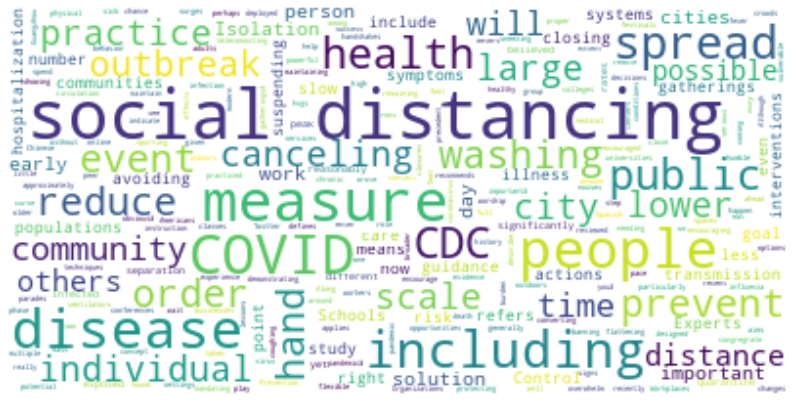

In [23]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(SD_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Thank you for viewing my Capstone project

## In the light of everything happening in the world today, Stay Safe!